In [55]:
from qiskit import *
from qiskit.visualization import plot_histogram

n = 5

In [66]:
# Funcao que completa a string com 0s para que tenha o tamanho exigido
def completeDigits(a, b):
    x = n - len(a)
    k = x*"0"
    a = k + a
    x = n - len(b)
    k = x*"0"
    b = k + b
    return a, b

In [67]:
# Funcao que recebe 2 strings com um numero binario de n digitos e retorna um 
# circuito quantico com eles mapeados
def addNumbers(a, b):
    a, b = completeDigits(a, b)
    qc = QuantumCircuit(4*n, n+1)
    for i in range(len(a)):
        if(a[i] == '1'):
            qc.x(n - 1 - i)
    
    for i in range(len(b)):
        if(b[i] == '1'):
            qc.x(2*n - 1 - i)
    return qc

In [68]:
# Inicializa os numeros
# qubits de 0 to 3 = primeiro numero
# qubits de 4 to 7 = segundo numero
qc = addNumbers("1011", "1110")

qc.barrier()

# Aplica a operacao de soma de 2 numeros
for i in range(n):
    qc.cx(i, i+(2*n))
    qc.cx(i+n, i+(2*n))
    qc.ccx(i, i+n, i+(3*n))
    if(i != 0):
        qc.ccx(i+n, i+((3*n)- 1), i+(3*n))
        qc.ccx(i, i+((3*n)- 1), i+(3*n))
        qc.cx(i+((3*n)- 1), i+(2*n))

qc.barrier()

for i in range(n):
    qc.measure(i + (2*n) ,i)
qc.measure(4*n - 1, n)

#qc.draw()

101001


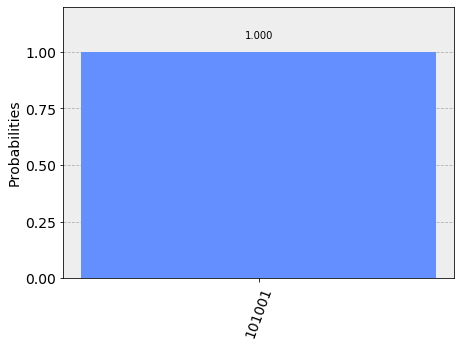

In [58]:
backend = Aer.get_backend("qasm_simulator")

a = execute(qc, backend).result().get_counts()

print("".join(a.keys()))
plot_histogram(a)
